In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = '/Users/Isha/Desktop/TUe/Year 3/Quarter 1 Y3/Data Challenge 3/DC3/data/food_crises_updated.csv'
df = pd.read_csv(file_path)
print(len(df))

12324


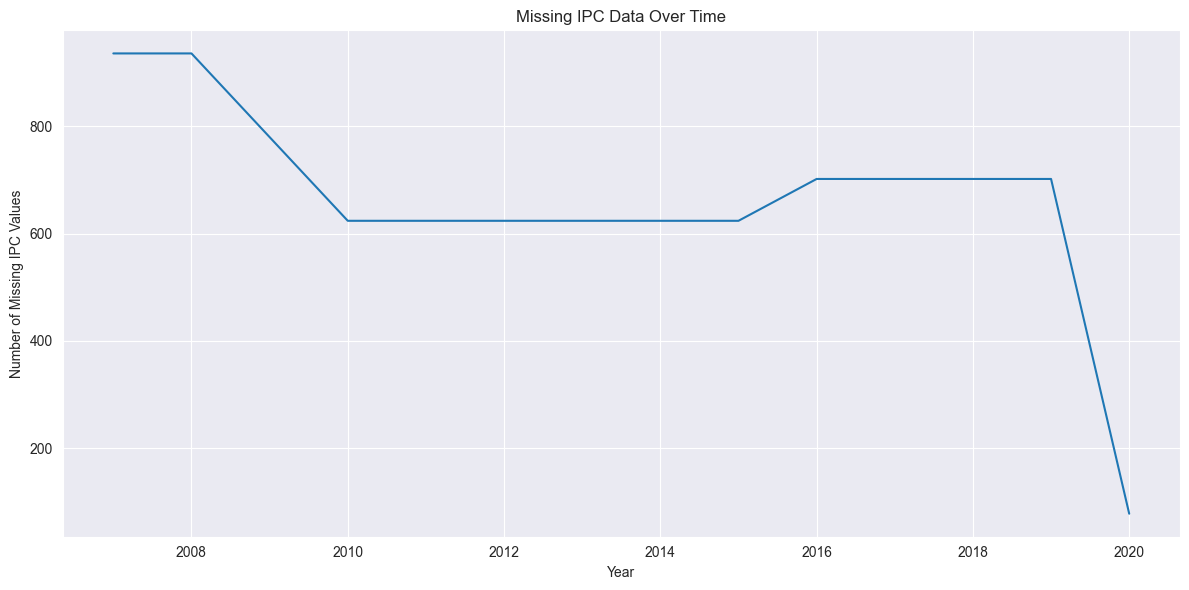

In [106]:
# Check missing data pattern for a specific column (e.g., 'IPC')
# Assuming 'IPC' is the column containing IPC data
ipc_missing_pattern = df['ipc'].isnull().sum()

# Analyze the pattern further, consider time-based analysis
# Example: Check if missing data has a pattern linearly with time
# Assuming a time-related column (e.g., 'date')
# Replace 'date' with the actual time-related column in dataset
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by year and count missing IPC values for each year
missing_by_year = df.groupby('year')['ipc'].apply(lambda x: x.isnull().sum())

# Plot the missing data pattern over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=missing_by_year.index, y=missing_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Missing IPC Values')
plt.title('Missing IPC Data Over Time')
plt.tight_layout()
plt.show()

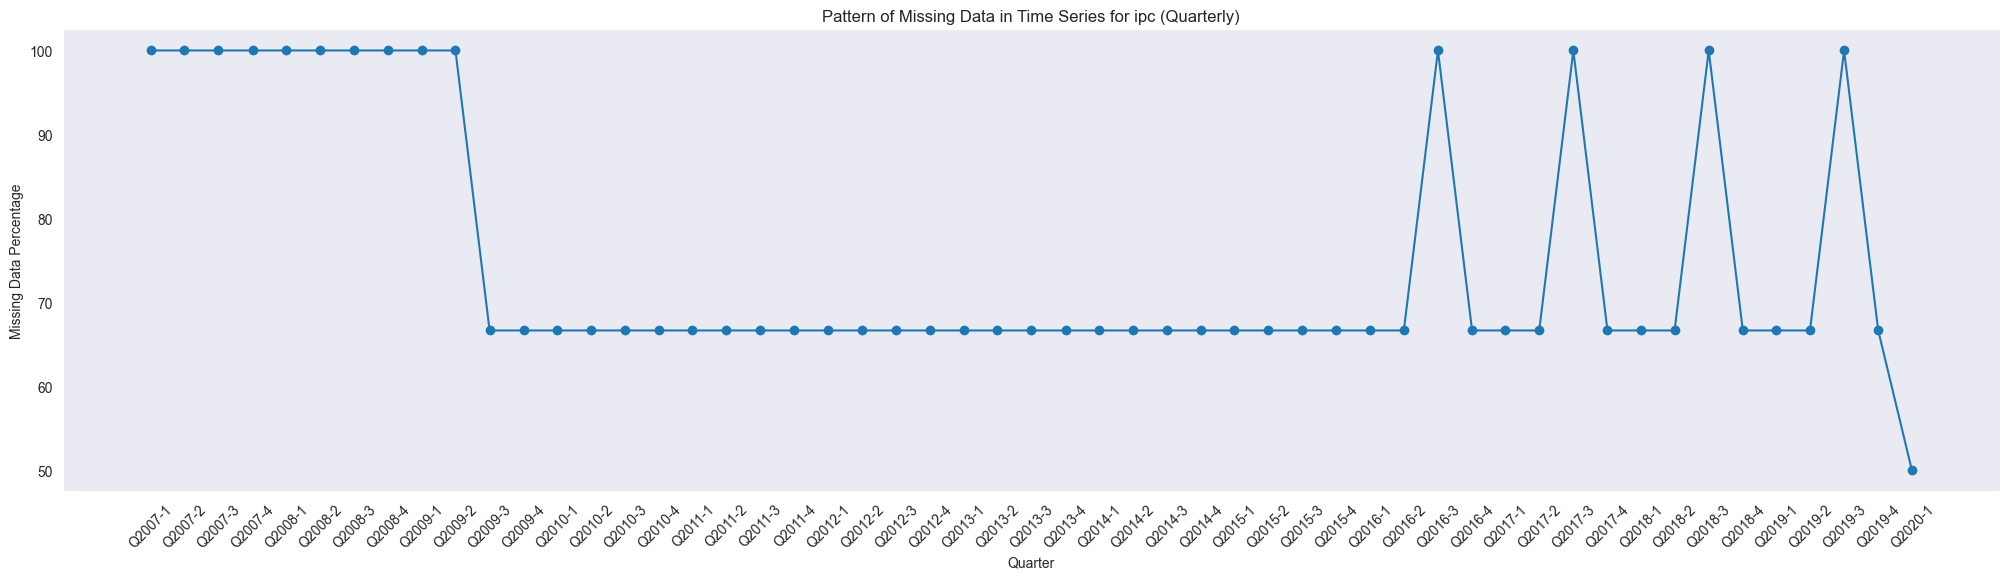

                country  district_code district     centx     centy  year  \
year_month                                                                  
2007-01-01  South Sudan             74      Bor  32.00486  6.465644  2007   
2007-02-01  South Sudan             74      Bor  32.00486  6.465644  2007   
2007-03-01  South Sudan             74      Bor  32.00486  6.465644  2007   
2007-04-01  South Sudan             74      Bor  32.00486  6.465644  2007   
2007-05-01  South Sudan             74      Bor  32.00486  6.465644  2007   

            month  ipc  ha  ndvi_mean  ...  food_price_idx      area  \
year_month                             ...                             
2007-01-01      1  NaN NaN   0.345851  ...        0.561363  14008.33   
2007-02-01      2  NaN NaN   0.307600  ...        0.565693  14008.33   
2007-03-01      3  NaN NaN   0.278344  ...        0.592437  14008.33   
2007-04-01      4  NaN NaN   0.303320  ...        0.605352  14008.33   
2007-05-01      5  NaN NaN  

In [107]:
# Convert 'year_month' to datetime and set it as the index
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y_%m')
df.set_index('year_month', inplace=True)

# Calculate the missing data percentage for each quarter
missing_data_percentage = df['ipc'].isnull().astype(int).resample('Q').mean() * 100
quarters = [f'Q{quarter.year}-{quarter.quarter}' for quarter in missing_data_percentage.index]

# Plot the missing data percentage over time (quarterly)
plt.figure(figsize=(25, 6))
plt.plot(missing_data_percentage.index, missing_data_percentage.values, marker='o', linestyle='-')
plt.xticks(missing_data_percentage.index, quarters, rotation=45)  # Set custom x-labels and rotate for readability
plt.xlabel('Quarter')
plt.ylabel('Missing Data Percentage')
plt.title('Pattern of Missing Data in Time Series for ipc (Quarterly)')
plt.grid()
plt.show()

# Extract the quarter from the 'year_month' column
df['quarters'] = df.index.to_period('Q')

# Display the updated DataFrame
print(df.head())


In [108]:
# Select columns with numerical data types
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the numerical column names
print("Numerical columns:")
print(numerical_columns)
print(df.columns)
unique_regions = df['administrative_region'].unique() #extracts the unique values from the 'administrative_region' column of the DataFrame
print('Unique administrative regions:', unique_regions)
print(df['quarters'].head(30))

Numerical columns:
Index(['district_code', 'centx', 'centy', 'year', 'month', 'ipc', 'ha',
       'ndvi_mean', 'ndvi_anom', 'rain_mean', 'rain_anom', 'et_mean',
       'et_anom', 'count_violence', 'sum_fatalities', 'food_price_idx', 'area',
       'cropland_pct', 'pop', 'ruggedness_mean', 'pasture_pct'],
      dtype='object')
Index(['country', 'district_code', 'district', 'centx', 'centy', 'year',
       'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom', 'rain_mean',
       'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities',
       'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean',
       'pasture_pct', 'date', 'province', 'administrative_region', 'quarters'],
      dtype='object')
Unique administrative regions: ['Greater Upper Nile' 'Bahr El Ghazal' 'Equatoria']
year_month
2007-01-01    2007Q1
2007-02-01    2007Q1
2007-03-01    2007Q1
2007-04-01    2007Q2
2007-05-01    2007Q2
2007-06-01    2007Q2
2007-07-01    2007Q3
2007-08-01    2007Q3
2007-09-01    

In [109]:
# Calculate the percentage of missing values for the column of interest
missing_percentage = (df['ipc'].isnull().sum() / len(df)) * 100
print(f"Percentage of missing values in ipc: {missing_percentage:.2f}%")


Percentage of missing values in ipc: 75.32%


In [110]:
## GREAT UPPER NILE
# Print the first 10 rows of 'district_code' and 'administrative_region' columns
#print(df.loc[:, ['district_code', 'administrative_region']].head(10))

# Initialize a set to store district codes for Greater Upper Nile (ensures uniqueness)
district_codes_nile_set = set()

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['administrative_region'] == 'Greater Upper Nile':
        district_codes_nile_set.add(row['district_code'])

# Convert the set back to a list (to maintain the original list data type)
district_codes_in_nile = list(district_codes_nile_set)

# Print the unique district codes in Greater Upper Nile
print('Unique District codes in Greater Upper Nile:', district_codes_in_nile)

Unique District codes in Greater Upper Nile: [130, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 147, 148, 149, 150, 151, 74, 104, 109, 111, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 127]


In [111]:
## BAHR EL GHAZAL

# Initialize a set to store district codes for Bahr El Ghazal (ensures uniqueness)
district_codes_bahr_set = set()

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['administrative_region'] == 'Bahr El Ghazal':
        district_codes_bahr_set.add(row['district_code'])

# Convert the set back to a list (to maintain the original list data type)
district_codes_in_bahr = list(district_codes_bahr_set)

# Print the unique district codes in Bahr El Ghazal
print('Unique District codes in Bahr El Ghazal:', district_codes_in_bahr)


Unique District codes in Bahr El Ghazal: [128, 129, 131, 132, 133, 141, 145, 75, 76, 99, 101, 103, 105, 106, 107, 108, 110, 112, 113, 117, 125, 126]


In [112]:
## EQUATORIA
# Initialize a set to store district codes for Equatoria (ensures uniqueness)
district_codes_eq_set = set()

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['administrative_region'] == 'Equatoria':
        district_codes_eq_set.add(row['district_code'])

# Convert the set back to a list (to maintain the original list data type)
district_codes_in_eq = list(district_codes_eq_set)

# Print the unique district codes in Equatoria
print('Unique District codes in Equatoria:', district_codes_in_eq)


Unique District codes in Equatoria: [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102]


In [113]:
## Checking if any of the district codes in each administrative regions overlap with each other
common_elements = district_codes_nile_set.intersection(district_codes_bahr_set, district_codes_eq_set)

if common_elements:
    print("There is an overlap:", common_elements)
else:
    print("No overlap.")

No overlap.


REGRESSION IMPUTATION - FIRST, DONE QUARTERLY FOR EACH ADMINISTRATIVE REGION SEPARATELY

High level approach:
1) Data preparation- Create separate DataFrames for each administrative region based on the unique district codes for that region. Select the relevant columns for regression imputation (year, food_price_idx, pasture_pct, ipc).
2) Drop rows with missing IPC values (as you’ll be predicting these).
3) Regression Imputation
4) Create a dataframe: Replace missing values from dataframe with predicted values
5) Repeat for Each Administrative Region

In [114]:
# Removing data before 2009Q3 as the quarterly data only begins from then on

# Remove data before 2009Q3
df = df[df['quarters'] >= pd.Period('2009Q3')]

# Save the modified DataFrame to a CSV file
df.to_csv('data/food_crises_2009.csv', index=False)

# Print the DataFrame (optional)
print(df)

print(df['quarters'].head(20))

                country  district_code district     centx     centy  year  \
year_month                                                                  
2009-07-01  South Sudan             74      Bor  32.00486  6.465644  2009   
2009-08-01  South Sudan             74      Bor  32.00486  6.465644  2009   
2009-09-01  South Sudan             74      Bor  32.00486  6.465644  2009   
2009-10-01  South Sudan             74      Bor  32.00486  6.465644  2009   
2009-11-01  South Sudan             74      Bor  32.00486  6.465644  2009   
...                 ...            ...      ...       ...       ...   ...   
2019-10-01  South Sudan            151  Malakal  31.64280  9.658457  2019   
2019-11-01  South Sudan            151  Malakal  31.64280  9.658457  2019   
2019-12-01  South Sudan            151  Malakal  31.64280  9.658457  2019   
2020-01-01  South Sudan            151  Malakal  31.64280  9.658457  2020   
2020-02-01  South Sudan            151  Malakal  31.64280  9.658457  2020   

In [115]:
# Calculate the percentage of missing values for the column of interest
missing_percentage = (df['ipc'].isnull().sum() / len(df)) * 100
print(f"Percentage of missing values in ipc: {missing_percentage:.2f}%")


Percentage of missing values in ipc: 69.53%


This indicates that approximately 69.53% of the 'ipc' column values are missing in the DataFrame after filtering the data to keep only from 2009Q3 onwards.

Regression Imputation in Greater Upper Nile (QUARTERLY):

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

"""
1. Filters the DataFrame for the Greater Upper Nile region based on the specified district codes.
2. Selects relevant features and target variable for regression imputation.
3. Drops rows with missing IPC values since IPC is the target variable for prediction.
4. Prepares features (X) and target (y) for regression.
5. Splits the data into training and testing sets.
6. Trains a linear regression model on the training data.
7. Predicts IPC values on the test set.
8. Calculates Mean Squared Error, R-squared, Root Mean Squared Error, and Mean Absolute Error.
"""
# Filter the DataFrame for the Greater Upper Nile region
greater_upper_nile_df = df[df['district_code'].isin(district_codes_in_nile)]

# Select relevant columns for regression imputation
selected_features = ['year', 'food_price_idx', 'pasture_pct', 'ipc']

# Drop rows with missing IPC values since that is what we are going to predict
greater_upper_nile_df.dropna(subset=['ipc'], inplace=True)

# Prepare features (X) and target (y) for regression
X_train_nile = greater_upper_nile_df[selected_features[:-1]]  # Features (excluding IPC)
y_train_nile = greater_upper_nile_df['ipc']  # Target variable (IPC)

# Train-test split
X_train_nile, X_test_nile, y_train_nile, y_test_nile = train_test_split(X_train_nile, y_train_nile, test_size=0.2, random_state=42)

# Train a regression model
model_nile = LinearRegression()
model_nile.fit(X_train_nile, y_train_nile)

# Predict IPC values on the test set
y_pred_nile = model_nile.predict(X_test_nile)

# Calculate Mean Squared Error and R-squared
mse_nile = mean_squared_error(y_test_nile, y_pred_nile)
r2_nile = r2_score(y_test_nile, y_pred_nile)
rmse_nile = np.sqrt(mse_nile)
mae_nile = mean_absolute_error(y_test_nile, y_pred_nile)

print('Mean Squared Error:', mse_nile)
print('R-squared:', r2_nile)
print('Root mean squared error: ', rmse_nile)
print('MAE:', mae_nile)


Mean Squared Error: 0.46653116271629924
R-squared: 0.4037178390640348
Root mean squared error:  0.683030865127118
MAE: 0.5575698490907361


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_18590/540025786.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greater_upper_nile_df.dropna(subset=['ipc'], inplace=True)


In [117]:
# Create a copy of greater_upper_nile_df
predicted_df_nile = greater_upper_nile_df.copy()

# Fill missing ipc values with predicted values
predicted_df_nile.loc[predicted_df_nile['ipc'].isnull(), 'ipc'] = model_nile.predict(predicted_df_nile[selected_features[:-1]])

# Display the first few rows of the predicted DataFrame
print(predicted_df_nile.head(10))

# Print the summary statistics for ipc column
print(predicted_df_nile['ipc'].describe())

                country  district_code district     centx     centy  year  \
year_month                                                                  
2009-07-01  South Sudan             74      Bor  32.00486  6.465644  2009   
2009-10-01  South Sudan             74      Bor  32.00486  6.465644  2009   
2010-01-01  South Sudan             74      Bor  32.00486  6.465644  2010   
2010-04-01  South Sudan             74      Bor  32.00486  6.465644  2010   
2010-07-01  South Sudan             74      Bor  32.00486  6.465644  2010   
2010-10-01  South Sudan             74      Bor  32.00486  6.465644  2010   
2011-01-01  South Sudan             74      Bor  32.00486  6.465644  2011   
2011-04-01  South Sudan             74      Bor  32.00486  6.465644  2011   
2011-07-01  South Sudan             74      Bor  32.00486  6.465644  2011   
2011-10-01  South Sudan             74      Bor  32.00486  6.465644  2011   

            month  ipc  ha  ndvi_mean  ...  food_price_idx      area  \
yea

1. MSE: (average of the squared differences between predicted values (y_pred_nile) and actual values (y_test_nile)) **0.467**, indicating a moderate level of prediction error.
2. R-squared: (measure of how well the model's predictions approximate the actual data points) **0.404**, suggesting that the model explains about 40.4% of the variance in the target variable.
3. RMSE: **0.683**, indicating the average deviation of predicted values from actual values.
4. MAE: ( average of the absolute differences between predicted values and actual values) **0.558**, representing the average absolute prediction error.

In [118]:
# Check if the 'ipc' column has any missing values
print('Does the ipc column have missing values?', predicted_df_nile['ipc'].isnull().any())


Does the ipc column have missing values? False


The imputation for greater upper nile has been done quarterly and the reason it is has no missing values is because the non-quarter months (not Jan, April, July, Oct) are not in the new dataframe predicted_nile_df

In [119]:
# Filter and print rows with missing IPC values for specific columns
missing_ipc_rows_specific_nile = predicted_df_nile.loc[predicted_df_nile['ipc'].isnull(), ['year', 'month', 'ipc']]
print(missing_ipc_rows_specific_nile.head(20))


Empty DataFrame
Columns: [year, month, ipc]
Index: []


From this we can confirm that the reg imputation has been done quarterly for Greater Upper Nile

Regression Imputation in Bahr El Ghazal (QUARTERLY):

In [120]:
# Filter the DataFrame for the Greater Upper Nile region
bahr_el_ghazal_df = df[df['district_code'].isin(district_codes_in_bahr)]

# Select relevant columns for regression imputation
selected_features = ['year', 'food_price_idx', 'pasture_pct', 'ipc']

# Drop rows with missing IPC values since that is what we are going to predict
bahr_el_ghazal_df.dropna(subset=['ipc'], inplace=True)

# Prepare features (X) and target (y) for regression
X_train_bahr = bahr_el_ghazal_df[selected_features[:-1]]  # Features (excluding IPC)
y_train_bahr = bahr_el_ghazal_df['ipc']  # Target variable (IPC)

# Train-test split
X_train_bahr, X_test_bahr, y_train_bahr, y_test_bahr = train_test_split(X_train_bahr, y_train_bahr, test_size=0.2, random_state=42)

# Train a regression model
model_bahr = LinearRegression()
model_bahr.fit(X_train_bahr, y_train_bahr)

# Predict IPC values on the test set
predicted_ipc_values_bahr = model_bahr.predict(X_test_bahr)

# Calculate Mean Squared Error, R-squared, Root Mean Squared Error, and Mean Absolute Error
mse_bahr = mean_squared_error(y_test_bahr, predicted_ipc_values_bahr)
r2_bahr = r2_score(y_test_bahr, predicted_ipc_values_bahr)
rmse_bahr = np.sqrt(mse_bahr)
mae_bahr = mean_absolute_error(y_test_bahr, predicted_ipc_values_bahr)

# Print the metrics
print('Mean Squared Error:', mse_bahr)
print('R-squared:', r2_bahr)
print('Root Mean Squared Error:', rmse_bahr)
print('Mean Absolute Error:', mae_bahr)

Mean Squared Error: 0.31719658006261225
R-squared: 0.5241407898289898
Root Mean Squared Error: 0.5632020774665273
Mean Absolute Error: 0.4450321054926077


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_18590/2057092682.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bahr_el_ghazal_df.dropna(subset=['ipc'], inplace=True)


In [121]:
# Create a copy of greater_upper_nile_df
predicted_df_bahr = bahr_el_ghazal_df.copy()

# Fill missing ipc values with predicted values
predicted_df_bahr.loc[predicted_df_bahr['ipc'].isnull(), 'ipc'] = model_bahr.predict(predicted_df_bahr[selected_features[:-1]])

# Display the first few rows of the predicted DataFrame
print(predicted_df_bahr.head(10))

# Print the summary statistics for ipc column
print(predicted_df_bahr['ipc'].describe())

                country  district_code   district     centx     centy  year  \
year_month                                                                    
2009-07-01  South Sudan             75  Jur River  28.02439  7.592506  2009   
2009-10-01  South Sudan             75  Jur River  28.02439  7.592506  2009   
2010-01-01  South Sudan             75  Jur River  28.02439  7.592506  2010   
2010-04-01  South Sudan             75  Jur River  28.02439  7.592506  2010   
2010-07-01  South Sudan             75  Jur River  28.02439  7.592506  2010   
2010-10-01  South Sudan             75  Jur River  28.02439  7.592506  2010   
2011-01-01  South Sudan             75  Jur River  28.02439  7.592506  2011   
2011-04-01  South Sudan             75  Jur River  28.02439  7.592506  2011   
2011-07-01  South Sudan             75  Jur River  28.02439  7.592506  2011   
2011-10-01  South Sudan             75  Jur River  28.02439  7.592506  2011   

            month  ipc  ha  ndvi_mean  ...  food_pr

In [122]:
# Check if the 'ipc' column has any missing values
print('Does the ipc column have missing values?', predicted_df_bahr['ipc'].isnull().any())


Does the ipc column have missing values? False


REGRESSION IMPUTATION FOR EQUATORIA: QUATERLY

In [123]:
# Filter the DataFrame for the Equatoria region
equatoria_df = df[df['administrative_region'] == 'Equatoria']

# Select relevant columns for regression imputation
selected_features = ['year', 'food_price_idx', 'pasture_pct', 'ipc']

# Drop rows with missing IPC values since that is what we are going to predict
equatoria_df.dropna(subset=['ipc'], inplace=True)

# Prepare features (X) and target (y) for regression
X_train_equatoria = equatoria_df[selected_features[:-1]]  # Features (excluding IPC)
y_train_equatoria = equatoria_df['ipc']  # Target variable (IPC)

# Train-test split
X_train_equatoria, X_test_equatoria, y_train_equatoria, y_test_equatoria = train_test_split(X_train_equatoria, y_train_equatoria, test_size=0.2, random_state=42)

# Train a regression model
model_equatoria = LinearRegression()
model_equatoria.fit(X_train_equatoria, y_train_equatoria)

# Predict IPC values on the test set
predicted_ipc_values_equatoria = model_equatoria.predict(X_test_equatoria)

# Calculate Mean Squared Error, R-squared, Root Mean Squared Error, and Mean Absolute Error
mse_equatoria = mean_squared_error(y_test_equatoria, predicted_ipc_values_equatoria)
r2_equatoria = r2_score(y_test_equatoria, predicted_ipc_values_equatoria)
rmse_equatoria = np.sqrt(mse_equatoria)
mae_equatoria = mean_absolute_error(y_test_equatoria, predicted_ipc_values_equatoria)

# Print the metrics
print('Mean Squared Error:', mse_equatoria)
print('R-squared:', r2_equatoria)
print('Root Mean Squared Error:', rmse_equatoria)
print('Mean Absolute Error:', mae_equatoria)


Mean Squared Error: 0.2596147280227205
R-squared: 0.5853859768092253
Root Mean Squared Error: 0.5095240210458389
Mean Absolute Error: 0.4166747413948826


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_18590/1420911989.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equatoria_df.dropna(subset=['ipc'], inplace=True)


In [124]:
# Create a copy of greater_upper_nile_df
predicted_df_equatoria = equatoria_df.copy()

# Fill missing ipc values with predicted values
predicted_df_equatoria.loc[predicted_df_equatoria['ipc'].isnull(), 'ipc'] = model_equatoria.predict(predicted_df_equatoria[selected_features[:-1]])

# Display the first few rows of the predicted DataFrame
print(predicted_df_equatoria.head(10))

# Print the summary statistics for ipc column
print(predicted_df_equatoria['ipc'].describe())

                country  district_code district     centx     centy  year  \
year_month                                                                  
2009-07-01  South Sudan             77   Morobo  30.83354  3.737241  2009   
2009-10-01  South Sudan             77   Morobo  30.83354  3.737241  2009   
2010-01-01  South Sudan             77   Morobo  30.83354  3.737241  2010   
2010-04-01  South Sudan             77   Morobo  30.83354  3.737241  2010   
2010-07-01  South Sudan             77   Morobo  30.83354  3.737241  2010   
2010-10-01  South Sudan             77   Morobo  30.83354  3.737241  2010   
2011-01-01  South Sudan             77   Morobo  30.83354  3.737241  2011   
2011-04-01  South Sudan             77   Morobo  30.83354  3.737241  2011   
2011-07-01  South Sudan             77   Morobo  30.83354  3.737241  2011   
2011-10-01  South Sudan             77   Morobo  30.83354  3.737241  2011   

            month  ipc  ha  ndvi_mean  ...  food_price_idx      area  \
yea

Boxplots to see distribution of ipc values accross all 3 regions:

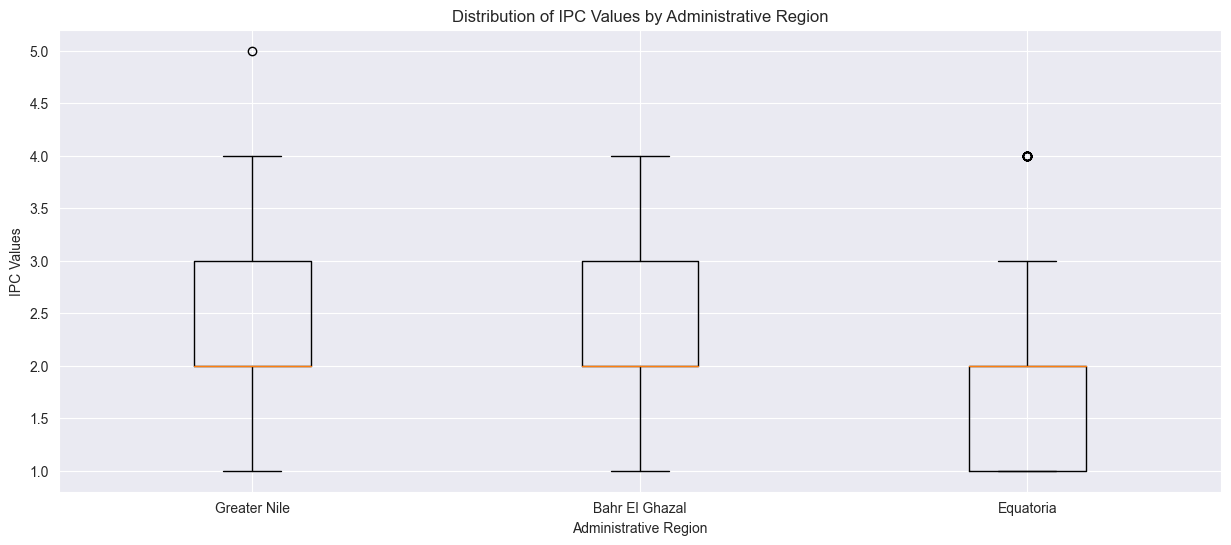

In [125]:
import matplotlib.pyplot as plt

# Data for boxplots
ipc_data = [predicted_df_nile['ipc'].dropna(), predicted_df_bahr['ipc'].dropna(), predicted_df_equatoria['ipc'].dropna()]
labels = ['Greater Nile', 'Bahr El Ghazal', 'Equatoria']

# Create a figure and axis for the plot
plt.figure(figsize=(15, 6))

# Create boxplots for IPC values in predicted_df_nile, predicted_df_bahr, and predicted_df_equatoria
plt.boxplot(ipc_data, labels=labels)
plt.xlabel('Administrative Region')
plt.ylabel('IPC Values')
plt.title('Distribution of IPC Values by Administrative Region')
plt.show()


In [126]:
# Data for the metrics
regions = ['Greater Upper Nile', 'Bahr El Ghazal', 'Equatoria']
mse_values = [0.46653116271629924, 0.31719658006261225, 0.2596147280227205]
rmse_values = [0.683030865127118, 0.5632020774665273, 0.5095240210458389]
mae_values = [0.5575698490907361, 0.4450321054926077, 0.4166747413948826]
r2_values = [0.4037178390640348, 0.5241407898289898, 0.5853859768092253]

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Region': regions,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-squared': r2_values
})

# Print the DataFrame
metrics_df


,Region,MSE,RMSE,MAE,R-squared
0,Greater Upper Nile,0.466531,0.683031,0.557570,0.403718
1,Bahr El Ghazal,0.317197,0.563202,0.445032,0.524141
2,Equatoria,0.259615,0.509524,0.416675,0.585386


In [127]:
# Combine the DataFrames vertically
new_df = pd.concat([predicted_df_nile, predicted_df_bahr, predicted_df_equatoria], axis=0)

# Reset the index for the combined DataFrame
new_df.reset_index(drop=True, inplace=True)

# Print the first few rows of the combined DataFrame
new_df

print(new_df['ipc'].describe())


count    3042.000000
mean        2.124918
std         0.896948
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: ipc, dtype: float64


In [128]:
# Save the modified DataFrame to a CSV file
new_df.to_csv('data/food_crises_reg_imputed.csv', index=False)


In [129]:
# Check for missing values in the DataFrame
missing_values = new_df.isnull().any()

# Print columns with missing values
print('Columns with missing values:')
print(missing_values[missing_values])  # Print only columns with missing values


Columns with missing values:
ha    True
dtype: bool


column with humanitarian aid is still missing values